## Setup

In [1]:
!pip show kaggle



Name: kaggle
Version: 1.7.4.2
Summary: Access Kaggle resources anywhere
Home-page: https://github.com/Kaggle/kaggle-api
Author: 
Author-email: Kaggle <support@kaggle.com>
License: Apache License
                                   Version 2.0, January 2004
                                http://www.apache.org/licenses/
        
           TERMS AND CONDITIONS FOR USE, REPRODUCTION, AND DISTRIBUTION
        
           1. Definitions.
        
              "License" shall mean the terms and conditions for use, reproduction,
              and distribution as defined by Sections 1 through 9 of this document.
        
              "Licensor" shall mean the copyright owner or entity authorized by
              the copyright owner that is granting the License.
        
              "Legal Entity" shall mean the union of the acting entity and all
              other entities that control, are controlled by, or are under common
              control with that entity. For the purposes of this

In [3]:
import kaggle
kaggle.api.authenticate()
kaggle.api.dataset_download_files("vipoooool/new-plant-diseases-dataset", path="C:/Users/swara/anaconda_projects/data", unzip=True)


Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset


In [4]:
import kaggle

# Authenticate (this works if kaggle.json is correctly placed in ~/.kaggle/)
kaggle.api.authenticate()

# Download the dataset
kaggle.api.dataset_download_files("vipoooool/new-plant-diseases-dataset", path="C:/Users/swara/anaconda_projects/data", unzip=True)

print("Download completed!")






Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset


ChunkedEncodingError: ('Connection broken: IncompleteRead(817843204 bytes read, 2079865983 more expected)', IncompleteRead(817843204 bytes read, 2079865983 more expected))

In [6]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np

import os

## image parameters ,batch size and number  of epochs 

In [7]:


image_size = 224
target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)

batch_size = 32
epochs = 25

## Get data

In order to make the most of our few training examples, we will "augment" them via a number of random transformations, so that our model would never see twice the exact same picture. This helps prevent overfitting and helps the model generalize better.

In TensorFlow this can be done via the `tf.keras.preprocessing.image.ImageDataGenerator` class. This class allows you to:

- configure random transformations and normalization operations to be done on your image data during training
- instantiate generators of augmented image batches (and their labels) via `.flow(data, labels)` or `.flow_from_directory(directory)`. These generators can then be used with the `tf.keras` model methods that accept data generators as inputs, `fit`, `evaluate` and `predict`.

In [26]:
# base_dir = "../input/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)"
base_dir = r"C:\Users\swara\anaconda_projects\data\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)"
train_dir = os.path.join(base_dir,"train")   
test_dir = os.path.join(base_dir,"valid") 



# Identify Plant Diseases

We use the PlantVillage dataset [1] by Hughes et al. consists of about 87,000 healthy and unhealthy leaf images divided into 38 categories by species and disease. Here we provide a subset of our experiments on working with this data. We also end up transfer learning from MobileNet and use the weights from pre-training on ImageNet.

* ![PlantVillage Dataset Samples](https://i.imgur.com/Zcxdrlc.png)
Figure 1. PlantVillage Dataset Samples

## Classes

The following 38 classes are availaible in the dataset

- `Apple___Apple_scab` 
- `Apple___Black_rot` 
- `Apple___Cedar_apple_rust` 
- `Apple___healthy` 
- `Blueberry___healthy` 
- `Cherry_(including_sour)___Powdery_mildew` 
- `Cherry_(including_sour)___healthy` 
- `Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot` 
- `Corn_(maize)___Common_rust_` 
- `Corn_(maize)___Northern_Leaf_Blight` 
- `Corn_(maize)___healthy', 'Grape___Black_rot` 
- `Grape___Leaf_blight_(Isariopsis_Leaf_Spot)` 
- `Grape___healthy` 
- `Orange___Haunglongbing_(Citrus_greening)` 
- `Peach___Bacterial_spot` 
- `Peach___healthy` 
- `Pepper,_bell___Bacterial_spot` 
- `Pepper,_bell___healthy` 
- `Potato___Early_blight` 
- `Potato___Late_blight` 
- `Potato___healthy` 
- `Raspberry___healthy` 
- `Soybean___healthy` 
- `Squash___Powdery_mildew` 
- `Strawberry___Leaf_scorch` 
- `Strawberry___healthy` 
- `Tomato___Bacterial_spot` 
- `Tomato___Late_blight` 
- `Tomato___Leaf_Mold` 
- `Tomato___Septoria_leaf_spot` 
- `Tomato___Spider_mites Two-spotted_spider_mite` 
- `Tomato___Target_Spot` 
- `Tomato___Tomato_Yellow_Leaf_Curl_Virus` 
- `Tomato___Tomato_mosaic_virus` 
- `Tomato___healthy`

## References

[1] Hughes, David P., and Marcel Salathe. “An Open Access Repository of Images on Plant Health to Enable the Development of Mobile Disease Diagnostics.” ArXiv:1511.08060 [Cs], Apr. 2016. arXiv.org, http://arxiv.org/abs/1511.08060.

[2] Howard, Andrew G., et al. “MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications.” ArXiv:1704.04861 [Cs], Apr. 2017. arXiv.org, http://arxiv.org/abs/1704.04861.


We make the following augmentations to the images:

- `width_shift` and `height_shift` are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally
- `rescale` is a value by which we will multiply the data before any other processing. Our original images consist in RGB coefficients in the 0-255, but such values would be too high for our models to process (given a typical learning rate), so we target values between 0 and 1 instead by scaling with a 1/255. factor.
- `shear_range` is for randomly applying shearing transformations
- `zoom_range` is for randomly zooming inside pictures
- `fill_mode` is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

In [29]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0,
                                                             shear_range = 0.2,
                                                             zoom_range = 0.2,
                                                             width_shift_range = 0.2,
                                                             height_shift_range = 0.2,
                                                             fill_mode="nearest")

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0)
print("yes completed")

yes completed


Let's prepare our data. We will use `.flow_from_directory()` to generate batches of image data (and their labels) directly from our images in their respective folders.

In [31]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (image_size, image_size),
                                               batch_size = batch_size,
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (image_size, image_size),
                                             batch_size = batch_size,
                                             class_mode = "categorical")

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


## Create a classes index file

We also want to know which class corresponds to which species and disease so we also create a `json` file which shows corresponding labels and class indices.

In [33]:
categories = list(train_data.class_indices.keys())
print(train_data.class_indices)


{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [35]:
import json
with open('class_indices.json','w') as f:
  json.dump(train_data.class_indices, f)

from IPython.display import FileLink
FileLink(r'class_indices.json')

C:\Users\swara\anaconda_projects\class_indices.json

## Training

We first get the base MobileNet model without including the top layers since we want to use it for 38 classes and us the pre-trained weights for ImageNet.

In [37]:
base_model = tf.keras.applications.MobileNet(weights = "imagenet",
                                             include_top = False,
                                             input_shape = input_shape)

base_model.trainable = False

We now create a small upstream model on top of the MobileNet using the functional API

In [39]:
inputs = keras.Input(shape = input_shape)

x = base_model(inputs, training = False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(len(categories), 
                          activation="softmax")(x)

model = keras.Model(inputs = inputs, 
                    outputs = x, 
                    name="LeafDisease_MobileNet")

In our multiple experiments we found out Adam optimizer to work really well with it's default learning rate, $\beta_1$, $\beta_2$ and $\epsilon$ values

In [41]:
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer = optimizer,
              loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True),
              metrics=[keras.metrics.CategoricalAccuracy(), 
                       'accuracy'])

In [43]:
history = model.fit(train_data,
                    validation_data=test_data,
                    epochs=epochs,
                    steps_per_epoch=150,
                    validation_steps=100)

C:\Users\swara\anaconda3\envs\tf_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25


C:\Users\swara\anaconda3\envs\tf_env\lib\site-packages\keras\src\backend\tensorflow\nn.py:666: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


150/150 ━━━━━━━━━━━━━━━━━━━━ 336s 2s/step - accuracy: 0.2910 - categorical_accuracy: 0.2910 - loss: 2.7679 - val_accuracy: 0.8006 - val_categorical_accuracy: 0.8006 - val_loss: 0.7967
Epoch 2/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 304s 2s/step - accuracy: 0.7587 - categorical_accuracy: 0.7587 - loss: 0.8737 - val_accuracy: 0.8678 - val_categorical_accuracy: 0.8678 - val_loss: 0.4923
Epoch 3/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 291s 2s/step - accuracy: 0.8304 - categorical_accuracy: 0.8304 - loss: 0.6034 - val_accuracy: 0.8856 - val_categorical_accuracy: 0.8856 - val_loss: 0.3926
Epoch 4/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 271s 2s/step - accuracy: 0.8522 - categorical_accuracy: 0.8522 - loss: 0.4973 - val_accuracy: 0.9078 - val_categorical_accuracy: 0.9078 - val_loss: 0.3155
Epoch 5/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 248s 2s/step - accuracy: 0.8794 - categorical_accuracy: 0.8794 - loss: 0.4073 - val_accuracy: 0.9141 - val_categorical_accuracy: 0.9141 - val_loss: 0.2808
Epoch 6/25
150/150 ━━━━━━━━━━━━━━━━━

C:\Users\swara\anaconda3\envs\tf_env\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


150/150 ━━━━━━━━━━━━━━━━━━━━ 130s 867ms/step - accuracy: 0.9270 - categorical_accuracy: 0.9270 - loss: 0.2283 - val_accuracy: 0.9431 - val_categorical_accuracy: 0.9431 - val_loss: 0.1877
Epoch 16/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 206s 1s/step - accuracy: 0.9295 - categorical_accuracy: 0.9295 - loss: 0.2199 - val_accuracy: 0.9394 - val_categorical_accuracy: 0.9394 - val_loss: 0.1813
Epoch 17/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.9230 - categorical_accuracy: 0.9230 - loss: 0.2349 - val_accuracy: 0.9509 - val_categorical_accuracy: 0.9509 - val_loss: 0.1588
Epoch 18/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.9230 - categorical_accuracy: 0.9230 - loss: 0.2389 - val_accuracy: 0.9434 - val_categorical_accuracy: 0.9434 - val_loss: 0.1827
Epoch 19/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 197s 1s/step - accuracy: 0.9203 - categorical_accuracy: 0.9203 - loss: 0.2390 - val_accuracy: 0.9422 - val_categorical_accuracy: 0.9422 - val_loss: 0.1787
Epoch 20/25
150/150 ━━━━━━━━━

## loss function vs epochs


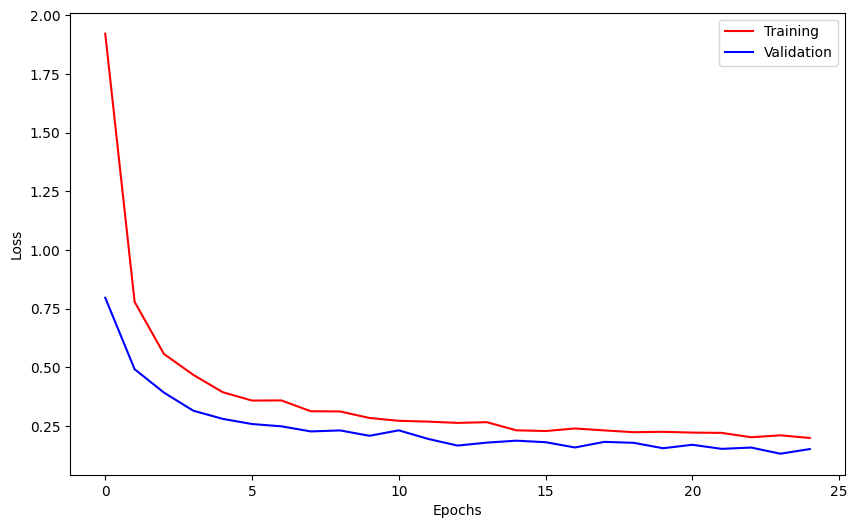

In [51]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

fig = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,val_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

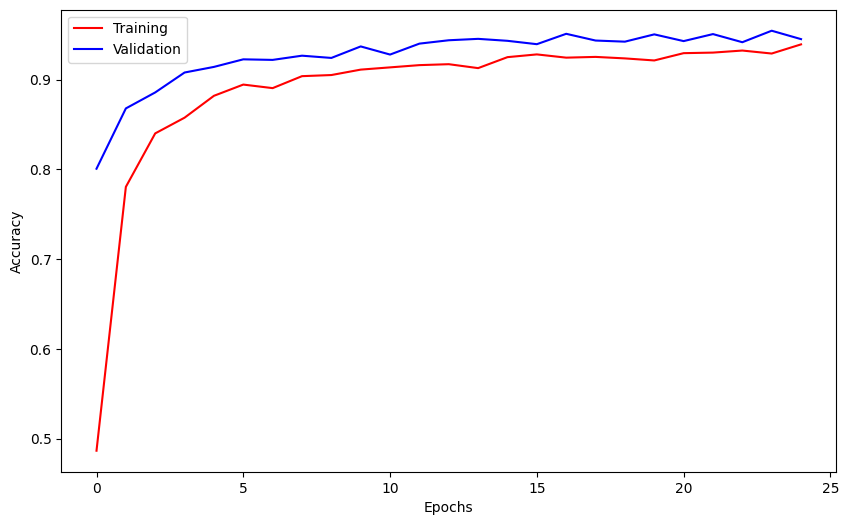

In [53]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

epochs = range(len(acc))

fig = plt.figure(figsize=(10,6))
plt.plot(epochs,acc,c="red",label="Training")
plt.plot(epochs,val_acc,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

## model saving 


In [62]:

model.save('plant_disease_model.keras')  # Native Keras format


## for resusing the trained model

In [11]:
from tensorflow.keras.models import load_model
model = load_model('keras_file/plant_disease_model.keras')

C:\Users\swara\anaconda3\envs\tf_env\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


## Converting to tflite Model

In [ ]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

## for single prediction 

In [77]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess an image
img_path = 'path/to/test/image.jpg'
img = image.load_img(img_path, target_size=(image_size, image_size))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # rescaling


prediction = model.predict(img_array)
predicted_class = prediction.argmax()
print(f"Predicted class: {categories[predicted_class]}")
print(f"Confidence: {prediction[0][predicted_class]:.2%}")


In [75]:
print(os.getcwd())

C:\Users\swara\anaconda_projects


In [5]:
import keras 
print(keras.__version__)

3.8.0


In [7]:
import tensorflow  as tf
print(tf.__version__)


2.18.0
